## Step 1: Reading and Understanding the Data

In [7]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing libraries
import pandas as pd
import numpy as np


In [9]:
# reading the csv
df = pd.read_csv('day.csv', index_col='instant')

In [10]:
# inspecting the head
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822


In [11]:
# inspecting the head
df.tail(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
721,22-12-2019,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
722,23-12-2019,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
723,24-12-2019,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
724,25-12-2019,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [12]:
# inspecting the columns
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [13]:
# assessing whether there are any columns with empty variables and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [14]:
# Adding a derived columns that may be better predictors than individual columns


# Temperature and Humidity Interaction:
df['temp_hum_interaction'] = df['temp'] * df['hum']

# Create a binary column indicating whether a day is a weekend:
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Creating a lagged variable if Bike rentals on a given day could depend on the number of rentals on the previous day. 
df['lagged_cnt'] = df['cnt'].shift(1)


## Step 2: Visualising the Data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.pairplot(df, height=2)
plt.show()

## Step 3: Data Preparation

In [20]:
# creating dummy variables for categorical columns
df = pd.get_dummies(df, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], drop_first=True)


In [28]:
# inspecting head after adding dummy variables
df.head(10)


,temp,atemp,hum,windspeed,casual,registered,cnt,temp_hum_interaction,is_weekend,lagged_cnt,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985,1137.098617,1,NaN,...,0,0,0,0,0,0,1,0,1,0
2,14.902598,17.68695,69.6087,16.652113,131,670,801,1037.350473,1,985.0,...,0,0,0,0,0,0,0,0,1,0
3,8.050924,9.47025,43.7273,16.636703,120,1229,1349,352.045169,0,801.0,...,0,1,0,0,0,0,0,1,0,0
4,8.200000,10.60610,59.0435,10.739832,108,1454,1562,484.156700,0,1349.0,...,0,0,1,0,0,0,0,1,0,0
5,9.305237,11.46350,43.6957,12.522300,82,1518,1600,406.598844,0,1562.0,...,0,0,0,1,0,0,0,1,0,0
6,8.378268,11.66045,51.8261,6.000868,88,1518,1606,434.212955,0,1600.0,...,0,0,0,0,1,0,0,1,0,0
7,8.057402,10.44195,49.8696,11.304642,148,1362,1510,401.819415,0,1606.0,...,0,0,0,0,0,1,0,1,1,0
8,6.765000,8.11270,53.5833,17.875868,68,891,959,362.491024,1,1510.0,...,0,0,0,0,0,0,1,0,1,0
9,5.671653,5.80875,43.4167,24.250650,54,768,822,246.244457,1,959.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'temp_hum_interaction', 'is_weekend', 'lagged_cnt', 'season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [25]:
# Check if 'dteday' is in the DataFrame columns
if 'dteday' in df.columns:
    df = df.drop(columns=['dteday'])
else:
    print("'dteday' column not found in DataFrame")



'dteday' column not found in DataFrame


In [26]:
# inspecting columns after adding dummy variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  730 non-null    float64
 1   atemp                 730 non-null    float64
 2   hum                   730 non-null    float64
 3   windspeed             730 non-null    float64
 4   casual                730 non-null    int64  
 5   registered            730 non-null    int64  
 6   cnt                   730 non-null    int64  
 7   temp_hum_interaction  730 non-null    float64
 8   is_weekend            730 non-null    int64  
 9   lagged_cnt            729 non-null    float64
 10  season_2              730 non-null    uint8  
 11  season_3              730 non-null    uint8  
 12  season_4              730 non-null    uint8  
 13  yr_1                  730 non-null    uint8  
 14  mnth_2                730 non-null    uint8  
 15  mnth_3                7

In [37]:
# Display columns with NaN values
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

# Optionally, you can also see the number of NaNs in each of these columns
nan_counts = df.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print(nan_counts)


Columns with NaN values: ['lagged_cnt']
lagged_cnt    1
dtype: int64


In [38]:
# Drop the row with NaN in the 'lagged_cnt' column
df = df.dropna(subset=['lagged_cnt'])

# Verify that the NaN row has been dropped
print(df.isna().sum())  # This should show 0 NaNs in 'lagged_cnt'


temp                    0
atemp                   0
hum                     0
windspeed               0
casual                  0
registered              0
cnt                     0
temp_hum_interaction    0
is_weekend              0
lagged_cnt              0
season_2                0
season_3                0
season_4                0
yr_1                    0
mnth_2                  0
mnth_3                  0
mnth_4                  0
mnth_5                  0
mnth_6                  0
mnth_7                  0
mnth_8                  0
mnth_9                  0
mnth_10                 0
mnth_11                 0
mnth_12                 0
holiday_1               0
weekday_1               0
weekday_2               0
weekday_3               0
weekday_4               0
weekday_5               0
weekday_6               0
workingday_1            0
weathersit_2            0
weathersit_3            0
dtype: int64


## Step 4: Splitting the Data into Training and Testing Sets


In [39]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Using MinMax scaling.

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
# list of columns that should be scaled (excluding dummy' variables)

num_vars = [
    'temp', 
    'atemp', 
    'hum', 
    'windspeed', 
    'casual', 
    'registered', 
    'cnt', 
    'temp_hum_interaction', 
    'lagged_cnt'
]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,temp_hum_interaction,is_weekend,lagged_cnt,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
627,0.614763,0.635584,0.557576,0.432979,0.229050,0.978047,0.864257,0.497830,0,0.466061,...,0,0,0,1,0,0,0,1,0,0
365,0.437201,0.461603,0.639826,0.445450,0.192884,0.213080,0.247069,0.423926,1,0.342499,...,0,0,0,0,0,0,1,0,0,0
427,0.442393,0.460736,0.645455,0.297488,0.278448,0.411115,0.438172,0.432002,1,0.364933,...,0,0,0,0,0,0,1,0,1,0
729,0.245101,0.210280,0.502164,0.772556,0.104381,0.153516,0.163786,0.207609,1,0.151749,...,0,0,0,0,0,0,0,0,0,0
483,0.395666,0.411155,0.508658,0.219584,0.326669,0.409579,0.456787,0.309619,1,0.714565,...,0,0,0,0,0,0,1,0,1,0


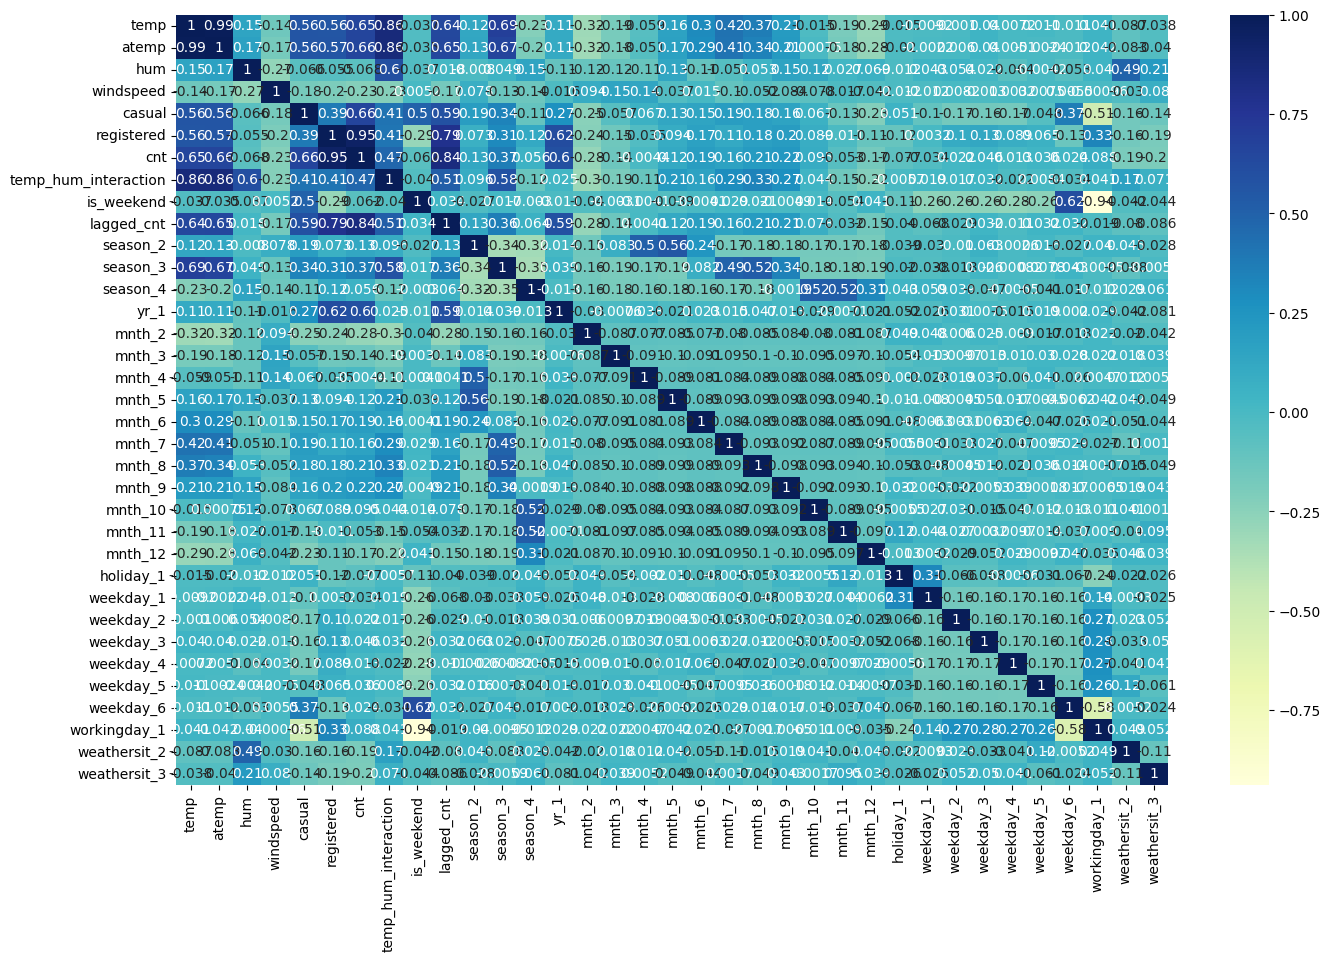

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train
df_train

,temp,atemp,hum,windspeed,casual,registered,temp_hum_interaction,is_weekend,lagged_cnt,season_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
627,0.614763,0.635584,0.557576,0.432979,0.229050,0.978047,0.497830,0,0.466061,0,...,0,0,0,1,0,0,0,1,0,0
365,0.437201,0.461603,0.639826,0.445450,0.192884,0.213080,0.423926,1,0.342499,0,...,0,0,0,0,0,0,1,0,0,0
427,0.442393,0.460736,0.645455,0.297488,0.278448,0.411115,0.432002,1,0.364933,0,...,0,0,0,0,0,0,1,0,1,0
729,0.245101,0.210280,0.502164,0.772556,0.104381,0.153516,0.207609,1,0.151749,0,...,0,0,0,0,0,0,0,0,0,0
483,0.395666,0.411155,0.508658,0.219584,0.326669,0.409579,0.309619,1,0.714565,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0.880586,0.886965,0.667532,0.434525,0.387827,0.831286,0.826134,0,0.832835,0,...,0,0,0,0,0,1,0,1,1,0
55,0.294718,0.289486,0.724562,0.521446,0.026757,0.195732,0.346179,0,0.218017,0,...,0,0,0,0,1,0,0,1,1,0
352,0.223295,0.229401,0.609091,0.319279,0.062041,0.273104,0.234591,1,0.312586,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Building a linear model

Using LinearRegression function from SciKit Learn with RFE 

In [44]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Initialize the model
lm = LinearRegression()

# Set up RFE to select 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('temp_hum_interaction', True, 1),
 ('is_weekend', True, 1),
 ('lagged_cnt', True, 1),
 ('season_2', False, 20),
 ('season_3', False, 16),
 ('season_4', False, 13),
 ('yr_1', False, 2),
 ('mnth_2', False, 18),
 ('mnth_3', False, 14),
 ('mnth_4', False, 7),
 ('mnth_5', False, 11),
 ('mnth_6', False, 3),
 ('mnth_7', True, 1),
 ('mnth_8', False, 9),
 ('mnth_9', False, 10),
 ('mnth_10', False, 12),
 ('mnth_11', False, 15),
 ('mnth_12', False, 5),
 ('holiday_1', False, 4),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 19),
 ('workingday_1', True, 1),
 ('weathersit_2', False, 17),
 ('weathersit_3', False, 8)]